In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Data Cleaning**


In [248]:
df.shape

(13320, 9)

In [249]:
#noyt needed
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [250]:
#dropping unnecessary colums
df2=df.drop(['area_type','society','balcony','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [251]:
null_counts=df2.isnull().sum()
null_counts

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

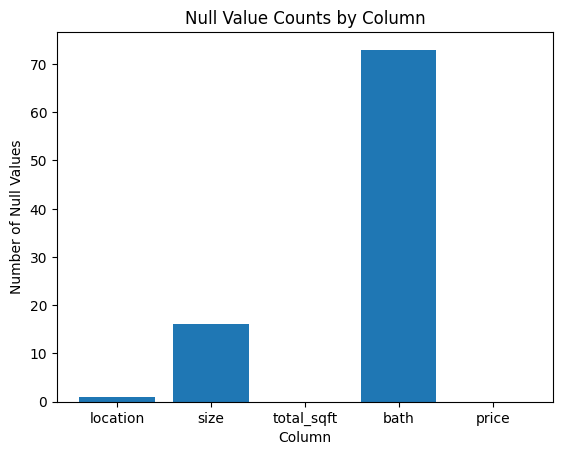

In [252]:
#visulaizing null values
plt.bar(null_counts.index, null_counts.values)
plt.title('Null Value Counts by Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')

plt.show()

In [253]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [254]:
df3['size'].unique()
#4bhk and 4 Bedroom is same sp we need to fix it

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [255]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [256]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [257]:
df3['total_sqft'].unique() #clean this column as we have range also and also singlr numbers

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [258]:
def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [259]:
df3[~df3['total_sqft'].apply(isfloat)].head(10) #some rows have eranges while some are in other units also like porch or meters

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [260]:
def convert_sqft_to_num(x):
  tokens=x.split("-")
  if len(tokens)==2:
    num=( float(tokens[0]) + float(tokens[1]) )/2
    return num
  try:
    #if its not a range but normal number
    return (float(x))
  except: #if its in another unit like perch or meter
    return None

In [261]:
df4=df3.copy()

In [262]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [263]:
#we no longet need size colums
df4.drop('size', axis=1,inplace=True)
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [264]:
len(df4['location'].unique())
#we have lots of locations so wee need to reduce them

1304

In [265]:
df4['location']=df4['location'].str.strip()
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [266]:
stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
stats
#some locations are very less so we can make thewm a new category names another location

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [267]:
len(stats[stats<=10]) #tells us the numbers o flocations that are less than 10

1052

In [268]:
df4['location']=df4['location'].apply(lambda x: 'other' if x in stats[stats<=10] else x)

In [269]:
len(df4['location'].unique())

242

In [270]:
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,other,1020.0,6.0,370.00,6


# **Removing outlier**

In [271]:
df5=df4.copy()

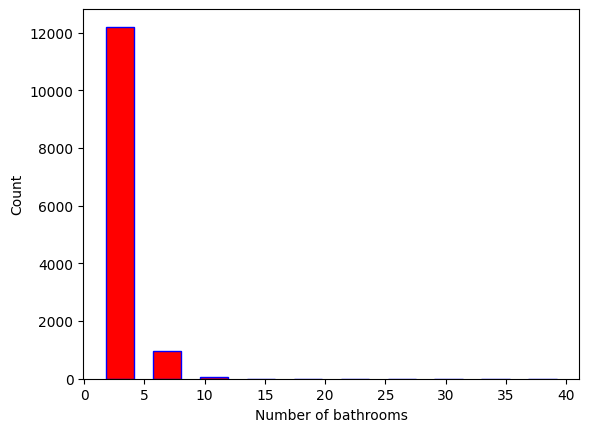

In [272]:
#now we cannot have usually more bathsrooms than room so now we will assume that if a house has 2 more bathrooms than rooms,its outlier
plt.hist(df5['bath'],rwidth=0.6,color='red',edgecolor='blue')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [273]:
df5[df5['bath']>df5['bhk']+2] #these are outlirs

,location,total_sqft,bath,price,bhk
1078,other,3300.0,14.0,500.0,9
1953,KR Puram,1200.0,12.0,110.0,8
1979,other,990.0,12.0,120.0,8
2620,other,11338.0,9.0,1000.0,6
6838,Rajaji Nagar,7500.0,8.0,1700.0,5
6937,5th Block Hbr Layout,2600.0,12.0,675.0,9
7709,Chikkabanavar,2460.0,7.0,80.0,4
8106,other,1850.0,12.0,300.0,8
9974,other,2400.0,6.0,775.0,3
9990,other,1200.0,9.0,122.0,6


In [274]:
df6=df5[df5['bath']<=df5['bhk']+2]
df6.shape

(13230, 5)

In [275]:
# we asum that total_sqft per bedroom is on avg 250
df6[df6['total_sqft']/df6['bhk']>=250].head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [295]:
Q1 = df6.quantile(0.25)
Q3 = df6.quantile(0.75)
IQR = Q3 - Q1

# Remove the data points that fall outside the IQR range
df6 = df6[~((df6 < (Q1 - 1.5 * IQR)) | (df6 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [296]:
df6.shape

(11062, 5)

# **Model building**



In [297]:
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [298]:
#one hot encoding for location
dummies=pd.get_dummies(df6['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
df7=pd.concat([df6,dummies.drop('other',axis=1)],axis='columns') #drop onme columns to avoid multicolinarity
df7.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
#no need of location column nor
df7.drop('location',axis=1,inplace=True)
df7.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
df8=df7.copy()
df8.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
df8.isnull().sum()
df8.dropna(inplace=True)

In [304]:
X=df8.drop('price',axis=1)
y=df8['price'].values

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.5731340983414857

In [306]:
#cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.55498586, 0.60253211, 0.57485405, 0.60895156, 0.60227591])

In [307]:
#we need to look for other regression methods also so we will use gridsearch cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
import warnings
warnings.filterwarnings("ignore")

In [308]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'fit_intercept': [True,False]
            }
        },
        'lasso': {
             'model': Lasso(),
             'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic'] 
             }   
        },
        'decision_tree': {
             'model': DecisionTreeRegressor(),
             'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random'] 
             }   
        }
    }
scores = []
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in algos.items():
  gs = GridSearchCV (mp['model'], mp['params'], cv=cv, return_train_score=False)
  gs.fit(X,y)
  scores.append({
        'model': model_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
     })
    
pd.DataFrame(scores, columns = ['model','best_score','best_params'])


,model,best_score,best_params
0,linear_regression,0.588720,{'fit_intercept': True}
1,lasso,0.487442,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.465652,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [289]:
import seaborn as sns

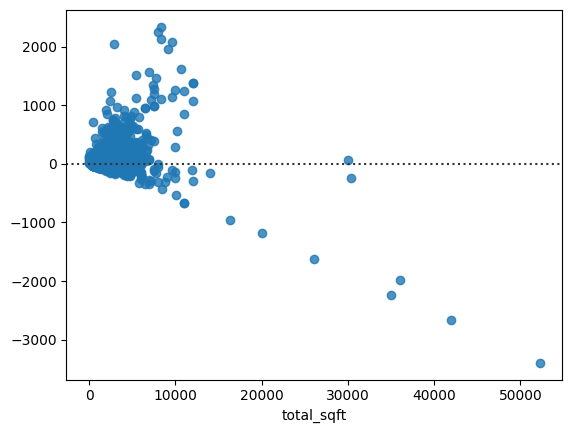

In [290]:
sns.residplot(x=X['total_sqft'], y=y, data=df8)
plt.show()

In [291]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [309]:
def predict_price (location,sqft,bath,bhk):
    loc_index = np.where (X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    
    return lm.predict([x])[0]


In [312]:
price=predict_price ('1st Block Jayanagar',2000,2,6)
print("Predicted house price is: ",round(price*100000,2),'RS')

Predicted house price is:  16426669.8 RS
